In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('output.csv', index_col=0)
df


,min bundle,max bundle,short text,long text,text bundle,png bundle,pdf bundle
compressor,,,,,,,
brotli,1.05,1.04,0.81,0.36,0.98,1.00,0.78
bz2,1.82,1.40,1.18,0.37,1.19,1.02,0.82
libflate_deflate,1.25,1.06,0.84,0.45,0.94,1.00,0.83
libflate_gzip,1.49,1.22,1.05,0.45,1.05,1.00,0.83
libflate_zlib,1.33,1.11,0.91,0.45,0.98,1.00,0.83
miniz,1.07,1.05,0.84,0.39,0.94,1.00,0.82
raw,1.00,1.00,1.00,1.00,1.00,1.00,1.00
smaz,1.11,1.11,0.66,0.65,0.80,1.20,1.17
snap,1.01,0.90,1.01,0.63,1.01,1.00,0.94


In [153]:
def colorify(val):
    clrs = ['Green', 'SpringGreen', 'Yellow', 'RedOrange', 'Red']
    #clrs = ['green', 'green', 'yellow', 'red', 'red']
    clrs = ['Green', 'Yellow', 'Red']
    if val < .5 :
        color = clrs[0]
    elif val <.95 :
        color = clrs[0]
    elif val < 1.05 :
        color = clrs[1]
    elif val < 1.5 :
        color = clrs[2]
    else:
        color = clrs[2]
    #color = 'red' if val > 1.0 else 'green'
    return '\textcolor{%s}{%.2f}' % (color, val)

print(df.to_latex(float_format=colorify, escape=False, bold_rows=False))

\begin{tabular}{lrrrrrrr}
\toprule
{} &              min bundle &              max bundle &              short text &               long text &             text bundle &              png bundle &              pdf bundle \\
compressor       &                         &                         &                         &                         &                         &                         &                         \\
\midrule
brotli           &    	extcolor{Red}{1.05} & 	extcolor{Yellow}{1.04} &  	extcolor{Green}{0.81} &  	extcolor{Green}{0.36} & 	extcolor{Yellow}{0.98} & 	extcolor{Yellow}{1.00} &  	extcolor{Green}{0.78} \\
bz2              &    	extcolor{Red}{1.82} &    	extcolor{Red}{1.40} &    	extcolor{Red}{1.18} &  	extcolor{Green}{0.37} &    	extcolor{Red}{1.19} & 	extcolor{Yellow}{1.02} &  	extcolor{Green}{0.82} \\
libflate_deflate &    	extcolor{Red}{1.25} &    	extcolor{Red}{1.06} &  	extcolor{Green}{0.84} &  	extcolor{Green}{0.45} &  	extcolor{Green}{0.94} & 	extcolor{Yel

In [122]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 1.0 else 'green'
    return 'color: %s' % color

s = df.style.applymap(color_red).highlight_min()
s

,min bundle,max bundle,short text,long text,text bundle,png bundle,pdf bundle
compressor,,,,,,,
brotli,1.05,1.04,0.81,0.36,0.98,1,0.78
bz2,1.82,1.4,1.18,0.37,1.19,1.02,0.82
libflate_deflate,1.25,1.06,0.84,0.45,0.94,1,0.83
libflate_gzip,1.49,1.22,1.05,0.45,1.05,1,0.83
libflate_zlib,1.33,1.11,0.91,0.45,0.98,1,0.83
miniz,1.07,1.05,0.84,0.39,0.94,1,0.82
raw,1,1,1,1,1,1,1
smaz,1.11,1.11,0.66,0.65,0.8,1.2,1.17
snap,1.01,0.9,1.01,0.63,1.01,1,0.94


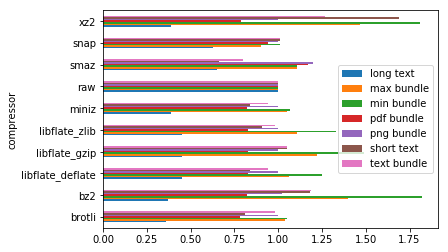

In [63]:
df.plot.barh()

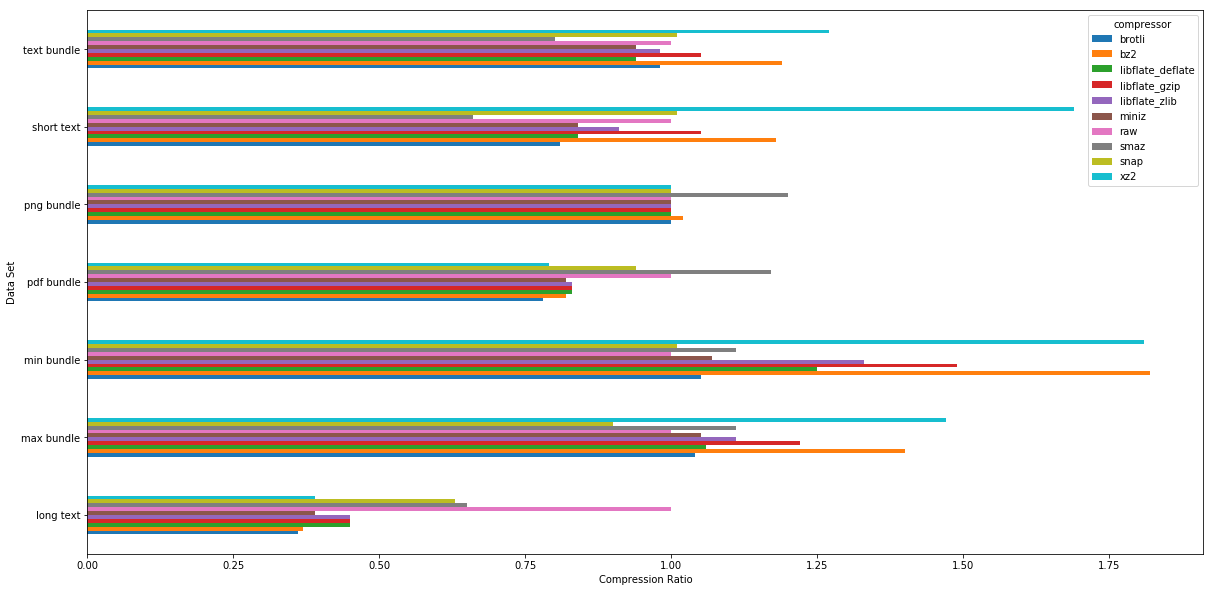

In [70]:
ax = df.T.plot.barh(figsize=(20,10))
ax.set_xlabel('Compression Ratio')
ax.set_ylabel('Data Set')
ax.figure.savefig('compressors-by-dataset.pdf')
plt.show()

In [46]:
df.T

compressor,brotli,bz2,libflate_deflate,libflate_gzip,libflate_zlib,miniz,raw,smaz,snap,xz2
long text,0.36,0.37,0.45,0.45,0.45,0.39,1.0,0.65,0.63,0.39
max bundle,1.04,1.40,1.06,1.22,1.11,1.05,1.0,1.11,0.90,1.47
min bundle,1.05,1.82,1.25,1.49,1.33,1.07,1.0,1.11,1.01,1.81
pdf bundle,0.78,0.82,0.83,0.83,0.83,0.82,1.0,1.17,0.94,0.79
png bundle,1.00,1.02,1.00,1.00,1.00,1.00,1.0,1.20,1.00,1.00
short text,0.81,1.18,0.84,1.05,0.91,0.84,1.0,0.66,1.01,1.69
text bundle,0.98,1.19,0.94,1.05,0.98,0.94,1.0,0.80,1.01,1.27
